In [1]:
from __future__ import print_function
__author__ = 'mo'
import pylab as pl
import numpy as np
%pylab inline

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import geopandas as gp
import json

import statsmodels.formula.api as smf
from statsmodels.graphics.api import abline_plot 


import sklearn.cluster
from sklearn import mixture
from PIL import Image
from scipy.misc import imread
from scipy.cluster.vq import kmeans2
import mplleaflet
import shapely.geometry as geom
import networkx as nx

Populating the interactive namespace from numpy and matplotlib


In [2]:
kelly_colors_hex = [
    '#FFB300', # Vivid Yellow
    '#803E75', # Strong Purple
    '#FF6800', # Vivid Orange
    '#A6BDD7', # Very Light Blue
    '#C10020', # Vivid Red
    '#CEA262', # Grayish Yellow
    '#817066', # Medium Gray
    '#007D34', # Vivid Green
    '#F6768E', # Strong Purplish Pink
    '#00538A', # Strong Blue
    '#FF7A5C', # Strong Yellowish Pink
    '#53377A', # Strong Violet
    '#FF8E00', # Vivid Orange Yellow
    '#B32851', # Strong Purplish Red
    '#F4C800', # Vivid Greenish Yellow
    '#7F180D', # Strong Reddish Brown
    '#93AA00', # Vivid Yellowish Green
    '#593315', # Deep Yellowish Brown
    '#F13A13', # Vivid Reddish Orange
    '#232C16', # Dark Olive Green
    ]


In [3]:
imco = pd.read_csv('/Users/mariaortiz/PUI2015_mortiz/ExtraCredit/imcodata2.csv')
#imco.head()

In [4]:
print(imco.columns)

Index([u'ciudad', u'clave', u'estado',
       u'Tasa homicidios Por cada cien mil habitantes',
       u'Robo de mercancias: Pesos 2012 por cada millon de pesos de PIB',
       u'safetyperception', u'mtCO2e',
       u'Proporcion del area del municipio con acuiferos sobreexplotados',
       u'waterpc', u'cap tratamiento de agua l/s por cada 1,000 hab',
       u'indice, \rValores de 0-3, en funcion a si mide, publica datos y tiene un Proaire',
       u'goodtrash', u'Aprovecha biogas Si=1, No=0', u'fuelpergdp',
       u'rend academico �% de alumnos de educacion basica y media superior en niveles Bueno y Excelente en Matematicas de prueba ENLACE',
       u'accessgoodschools', u'mortalidad diabetes Por cada 10 mil habitantes',
       u'mort infantil Decesos de menores de un a�o por cada mil nacidos vivos',
       u'Por cada 10 mil habitantes', u'acceso inst salud % de la PEA',
       u'crec accesso salud Tasa de cambio (%) entre 2008 y 2012',
       u' crec pob calificada Tasa de cambio (%) 

In [5]:
#creating dataframes for different variables to look at
#inf is my independent variable
inf = imco['inf']
citygrowth = imco['citygrowth']
popden = imco['popdensity']
minwage = imco['minwage']
gdppc = imco['gdppc']
eleccons = imco['fuelpergdp']
pop = imco['population']
index = imco['ciudad']
firms = imco['firmsper1000pea']
accschool = imco['accessgoodschools']

#Normalized data
elecpc = imco['fuelpergdp']/imco['population']
waterpc = imco['waterpc']


In [39]:
#viewing cell
inf.shape

(78,)

#Scatterplots of all variables against informal economy

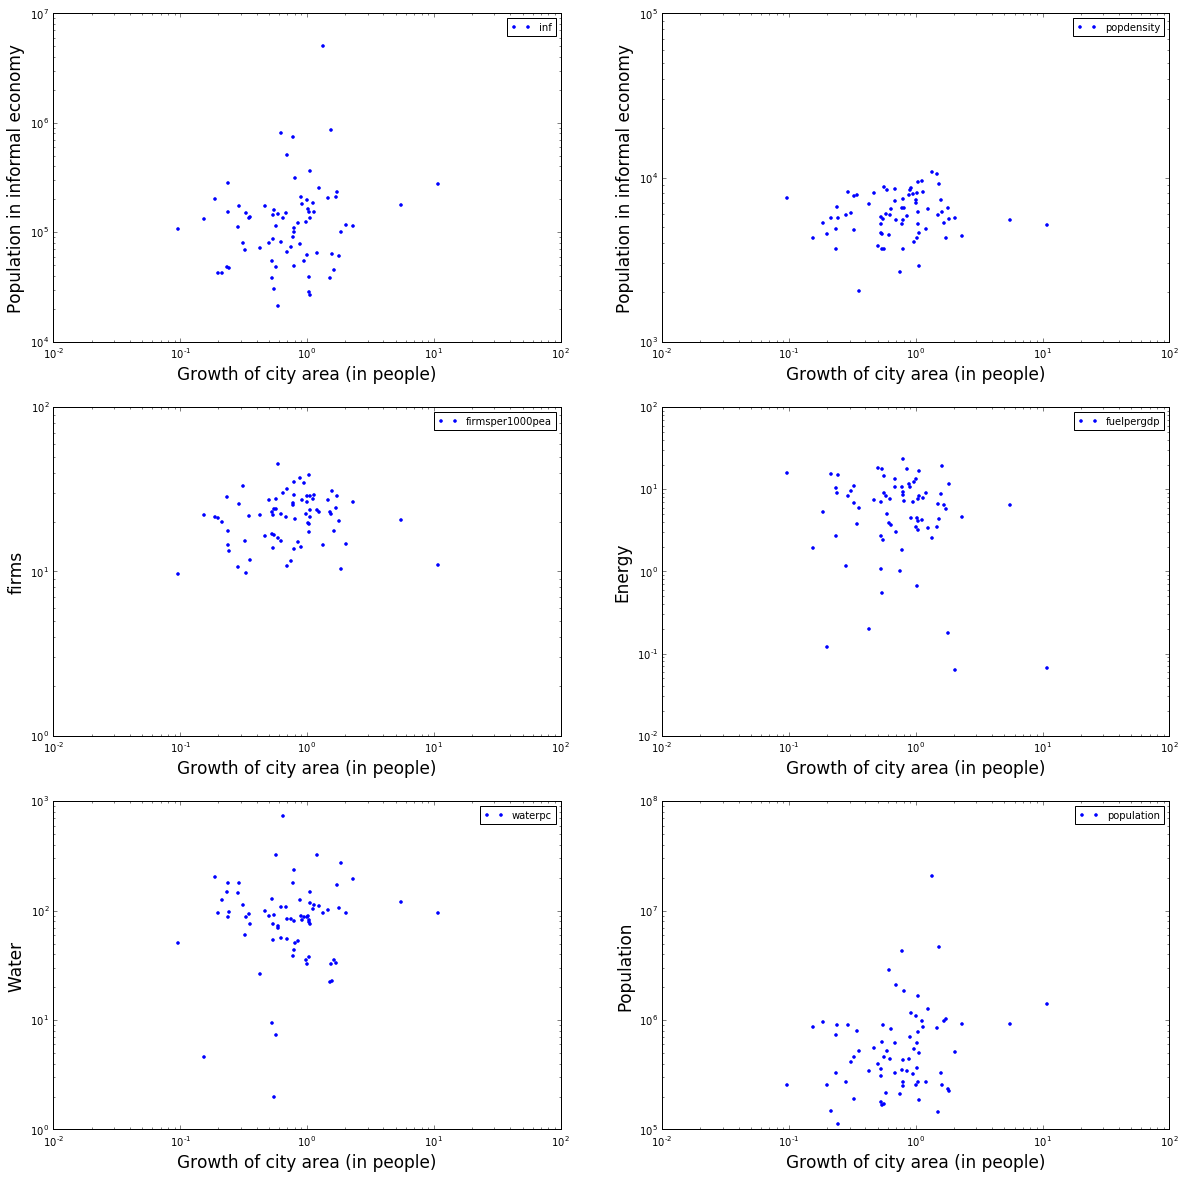

In [6]:
fig = pl.figure(figsize=(20,20))

pl.subplot(3,2,1)
pl.loglog(citygrowth, inf, '.')
pl.ylabel('Population in informal economy', fontsize=17)
pl.xlabel('Growth of city area (in people)', fontsize=17)
pl.legend(loc = 0, fontsize = 10)
#ax.setaxlim(0, 2000000)

pl.subplot(3,2,2)
pl.loglog(citygrowth, popden, '.')
pl.ylabel('Population in informal economy', fontsize=17)
pl.xlabel('Growth of city area (in people)', fontsize=17)
pl.legend(loc = 0, fontsize = 10)

pl.subplot(3,2,3)
pl.loglog(citygrowth, firms, '.')
pl.ylabel('firms', fontsize=17)
pl.xlabel('Growth of city area (in people)', fontsize=17)
pl.legend(loc = 0, fontsize = 10)

pl.subplot(3,2,4)
pl.loglog(citygrowth, eleccons, '.')
pl.ylabel('Energy', fontsize=17)
pl.xlabel('Growth of city area (in people)', fontsize=17)
pl.legend(loc = 0, fontsize = 10)

pl.subplot(3,2,5)
pl.loglog(citygrowth, waterpc, '.')
pl.ylabel('Water', fontsize=17)
pl.xlabel('Growth of city area (in people)', fontsize=17)
pl.legend(loc = 0, fontsize = 10)

pl.subplot(3,2,6)
pl.loglog(citygrowth, pop, '.')
pl.ylabel('Population', fontsize=17)
pl.xlabel('Growth of city area (in people)', fontsize=17)
pl.legend(loc = 0, fontsize = 10)

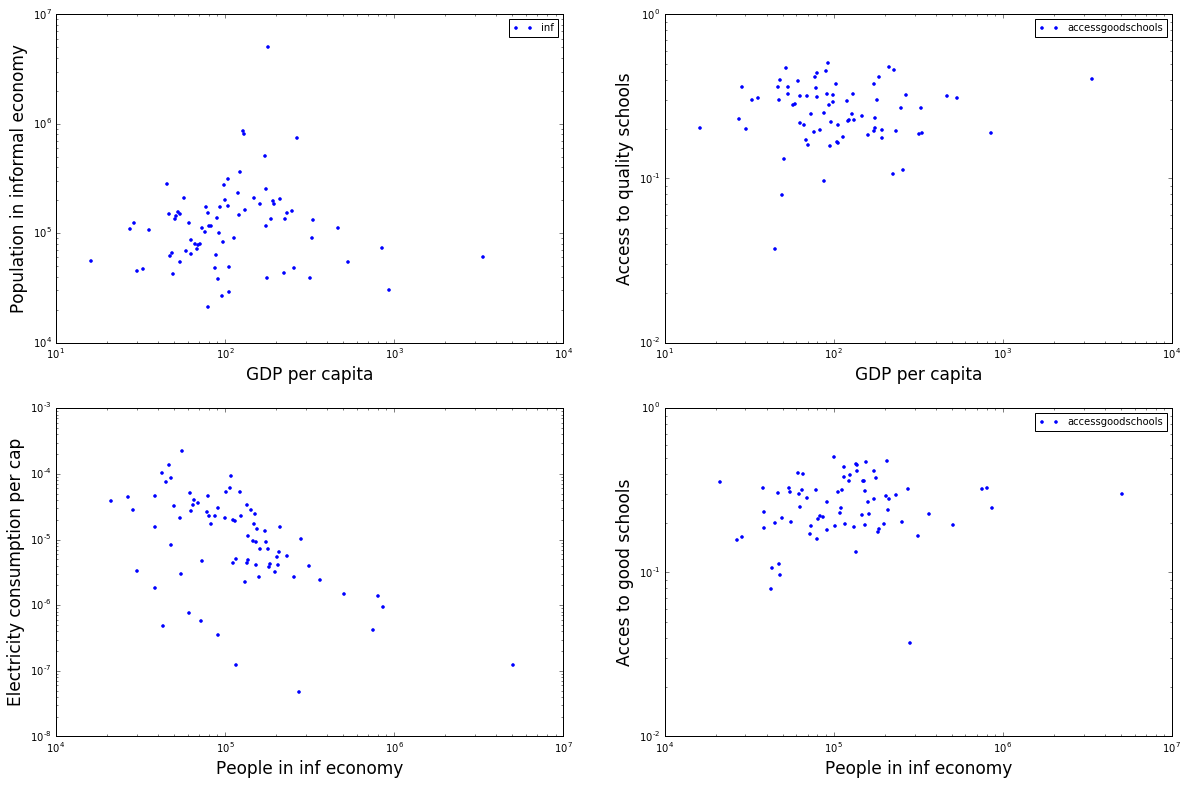

In [71]:
fig = pl.figure(figsize=(20,20))

pl.subplot(3,2,1)
pl.loglog(gdppc, inf, '.')
pl.xlabel('GDP per capita', fontsize=17)
pl.ylabel('Population in informal economy', fontsize=17)
pl.legend(loc = 0, fontsize = 10)
#ax.setaxlim(0, 2000000)

pl.subplot(3,2,2)
pl.loglog(gdppc, accschool, '.')
pl.xlabel('GDP per capita', fontsize=17)
pl.ylabel('Access to quality schools', fontsize=17)
pl.legend(loc = 0, fontsize = 10)
#ax.setaxlim(0, 2000000)


pl.subplot(3,2,3)
pl.loglog(inf, elecpc, '.')
pl.xlabel('People in inf economy', fontsize=17)
pl.ylabel('Electricity consumption per cap', fontsize=17)
pl.legend(loc = 0, fontsize = 10)
#ax.setaxlim(0, 2000000)

pl.subplot(3,2,4)
pl.loglog(inf, accschool, '.')
pl.xlabel('People in inf economy', fontsize=17)
pl.ylabel('Acces to good schools', fontsize=17)
pl.legend(loc = 0, fontsize = 10)
#ax.setaxlim(0, 2000000)


http://people.duke.edu/~rnau/rsquared.htm

#Linear Refgression Models

In [ ]:
import statsmodels.formula.api as smf
from statsmodels.graphics.api import abline_plot 
# Create a dictionary so we can use formula.ols
#inf = imco['inf']
#citygrowth = imco['citygrowth']
#popden = imco['popdensity']
#minwage = imco['minwage']
#eleccons = imco['fuelpergdp']
#waterpc = imco['waterpc']
#index = imco['ciudad']

In [40]:
#Informal Economy, GDP pc
d = {'x': inf, 'y': gdppc}
# Run regression and print summary
mod = smf.ols(formula='y ~ x', data = d).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.013
Method:                 Least Squares   F-statistic:                   0.03242
Date:                Mon, 14 Dec 2015   Prob (F-statistic):              0.858
Time:                        19:28:49   Log-Likelihood:                -576.76
No. Observations:                  78   AIC:                             1158.
Df Residuals:                      76   BIC:                             1162.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    189.7220     48.227      3.934      0.0

In [13]:
pop.min()

111614.1934

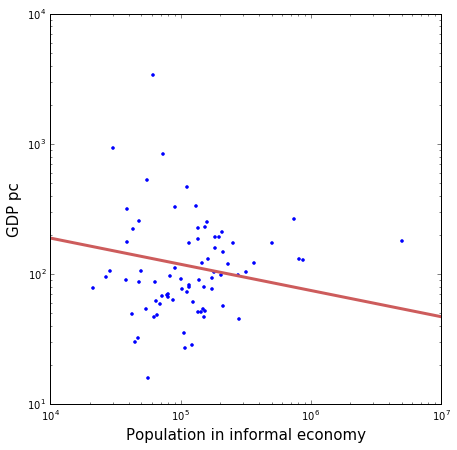

In [41]:
figure, ax = pl.subplots(figsize=(7,7))
y = gdppc#/1000
x = inf
ax.loglog(x, y, '.')

# Plot regression line
abline_plot(model_results=mod, color='IndianRed', ax=ax, lw = 3)

#ax.set_title('Linear Regression Line')
pl.ylabel('GDP pc', fontsize = 15)
pl.xlabel('Population in informal economy', fontsize = 15)
#ax.set_xlim=(0,2000000)
#ax.set_ylim(0,60)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.3265
Date:                Mon, 14 Dec 2015   Prob (F-statistic):              0.569
Time:                        19:29:38   Log-Likelihood:                -134.47
No. Observations:                  78   AIC:                             272.9
Df Residuals:                      76   BIC:                             277.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.9318      0.166      5.606      0.0

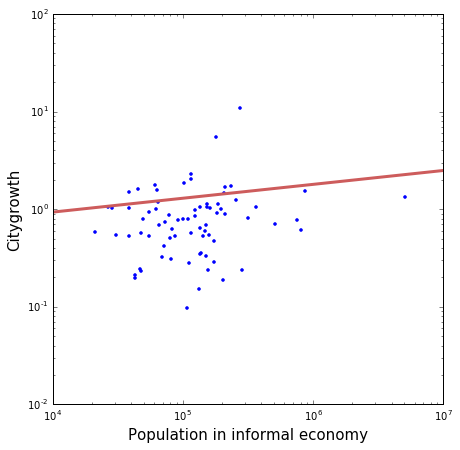

In [42]:
#Citygrowth
d = {'x': inf, 'y': citygrowth}
# Run regression and print summary
mod2 = smf.ols(formula='y ~ x', data = d).fit()
print(mod2.summary())
figure, ax = pl.subplots(figsize=(7,7))
y = citygrowth
x = inf
ax.loglog(x, y, '.')

# Plot regression line
abline_plot(model_results=mod2, color='IndianRed', ax=ax, lw = 3)

#ax.set_title('Linear Regression Line')
pl.ylabel('Citygrowth', fontsize = 15)
pl.xlabel('Population in informal economy', fontsize = 15)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.012
Method:                 Least Squares   F-statistic:                   0.06271
Date:                Mon, 14 Dec 2015   Prob (F-statistic):              0.803
Time:                        19:29:54   Log-Likelihood:                -465.89
No. Observations:                  78   AIC:                             935.8
Df Residuals:                      76   BIC:                             940.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    105.8597     11.641      9.093      0.0

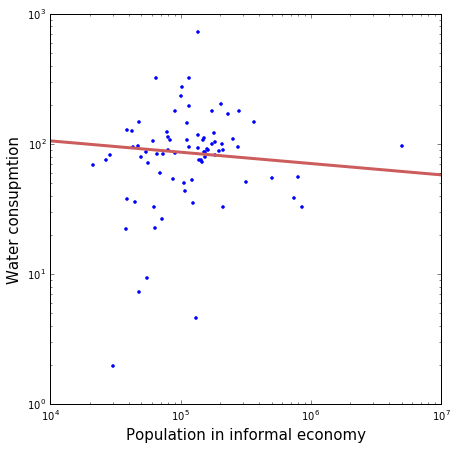

In [43]:
#water consumption
d = {'x': inf, 'y': waterpc}
# Run regression and print summary
mod3 = smf.ols(formula='y ~ x', data = d).fit()
print(mod3.summary())

figure, ax = pl.subplots(figsize=(7,7))
y = waterpc
x = inf
ax.loglog(x, y, '.')

# Plot regression line
abline_plot(model_results=mod3, color='IndianRed', ax=ax, lw = 3)

#ax.set_title('Linear Regression Line')
pl.ylabel('Water consupmtion', fontsize = 15)
pl.xlabel('Population in informal economy', fontsize = 15)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     1.845
Date:                Mon, 14 Dec 2015   Prob (F-statistic):              0.178
Time:                        19:30:05   Log-Likelihood:                -248.46
No. Observations:                  78   AIC:                             500.9
Df Residuals:                      76   BIC:                             505.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      7.9307      0.717     11.065      0.0

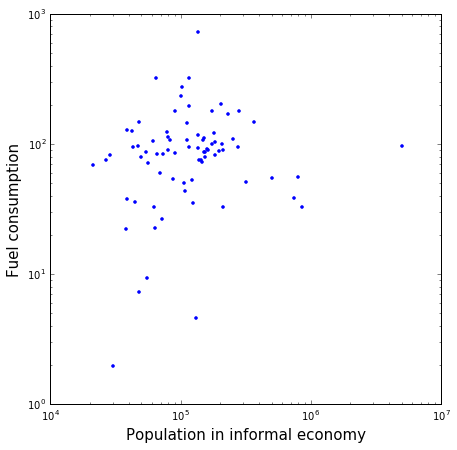

In [44]:
#Electricty
d = {'x': inf, 'y': eleccons}
# Run regression and print summary
mod4 = smf.ols(formula='y ~ x', data = d).fit()
print(mod4.summary())

figure, ax = pl.subplots(figsize=(7,7))
y = waterpc
x = inf
ax.loglog(x, y, '.')

# Plot regression line
abline_plot(model_results=mod4, color='IndianRed', ax=ax, lw = 3)

#ax.set_title('Linear Regression Line')
pl.ylabel('Fuel consumption', fontsize = 15)
pl.xlabel('Population in informal economy', fontsize = 15)


Params:  Intercept    2.583958e-05
x           -9.571128e-12
dtype: float64

Confidence interval:                        0             1
Intercept  1.747752e-05  3.420165e-05
x         -2.329384e-11  4.151584e-12

P values:  Intercept    3.272511e-08
x            1.688519e-01
dtype: float64



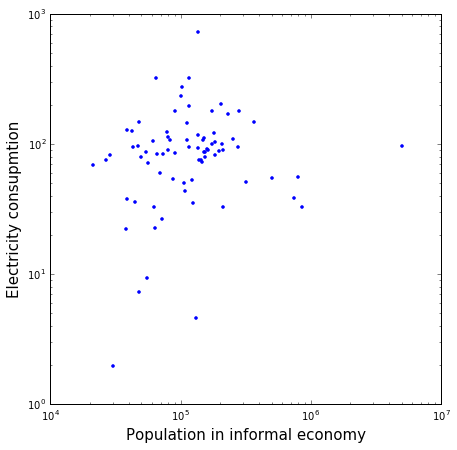

In [75]:
#Normalized electricity
d = {'x': inf, 'y': elecpc}
# Run regression and print summary
mod5 = smf.ols(formula='y ~ x', data = d).fit()
#print(mod3.summary())

figure, ax = pl.subplots(figsize=(7,7))
y = waterpc
x = inf
ax.loglog(x, y, '.')

# Plot regression line
abline_plot(model_results=mod5, color='IndianRed', ax=ax, lw = 3)
#ax.set_title('Linear Regression Line')

pl.ylabel('Electricity consupmtion', fontsize = 15)
pl.xlabel('Population in informal economy', fontsize = 15)

print("Params: ", mod5.params)
print("")
print("Confidence interval: ", mod5.conf_int())
print("")
print("P values: ", mod5.pvalues)
print("")
#print("R2: ", mod5.rquared())

In [69]:
d = {'x': inf, 'y': elecpc, 'y2': waterpc}
infmodel = smf.ols(formula='y + y2~ x', data = d).fit()
# print the coefficients
print("Params: ", infmodel.params)
print("")
#print("Confidence interval: ", infmodel.conf_int())
print("")
#print("P values: ", infmodel.pvalues)
print("")

Params:                        0           1
Intercept  2.583958e-05  105.859696
x         -9.571128e-12   -0.000005





##Distributions

In [11]:
print(inf.min())
print(inf.max())

21112
5032558


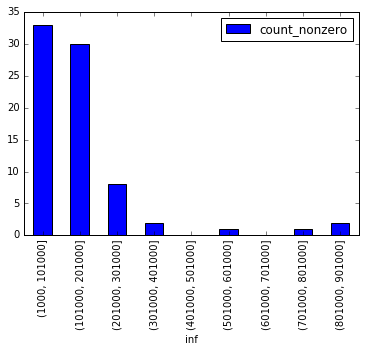

In [12]:
#number of workers in informal economy
fig = pl.figure(figsize=(10,10))
bins = np.arange(1000, 1000000, 100000)
inf.groupby(pd.cut(inf, bins)).agg([count_nonzero]).plot(kind='bar')

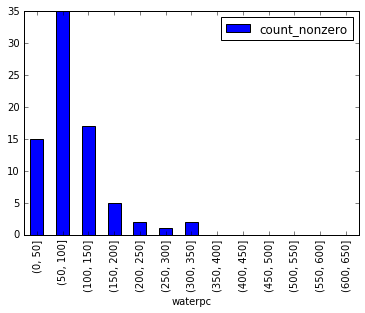

In [13]:
#water consumption
fig = pl.figure(figsize=(10,10))
bins = np.arange(0, 700, 50)
waterpc.groupby(pd.cut(waterpc, bins)).agg([count_nonzero]).plot(kind='bar')

In [14]:
#electricity consumption
eleccons.min()
eleccons.max()

31.77829494

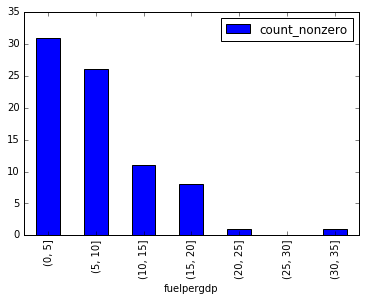

In [15]:
fig = pl.figure(figsize=(10,10))
bins = np.arange(0, 40, 5)
eleccons.groupby(pd.cut(eleccons, bins)).agg([count_nonzero]).plot(kind='bar')

In [16]:
#city growth
citygrowth.max()

10.85346663

In [ ]:
fig = pl.figure(figsize=(10,10))
bins = np.arange(-2, 4, 0.5)
citygrowth.groupby(pd.cut(citygrowth, bins)).agg([count_nonzero]).plot(kind='bar')

#Testing

In [21]:
import scipy.stats

###KS Test

In [22]:
kse=scipy.stats.ks_2samp(eleccons, inf)
print("Electricity: ", kse)
print("")
ksw=scipy.stats.ks_2samp(waterpc,inf)
print("Water: ", ksw)
#getting the same values...something is off

Electricity:  (1.0, 8.2543159563119173e-36)

Water:  (1.0, 8.2543159563119173e-36)


In [23]:
variablesks = [eleccons, waterpc, minwage, citygrowth, popden]
counter = 0

for i in variablesks: 
    ks=scipy.stats.ks_2samp(inf,i)
    #print(i)
    print("KS: ", ks)
    counter +=1
#waterpc.mean()

KS:  (1.0, 8.2543159563119173e-36)
KS:  (1.0, 8.2543159563119173e-36)
KS:  (1.0, 8.2543159563119173e-36)
KS:  (1.0, 8.2543159563119173e-36)
KS:  (1.0, 8.2543159563119173e-36)


###Spearmans

In [24]:
#running spearmans
r_Se = scipy.stats.spearmanr(inf, eleccons)
print(r_Se)
r_Sw = scipy.stats.spearmanr(inf, waterpc)
print(r_Sw)

(-0.18984812655698732, 0.095952511216741684)
(0.16999456239962568, 0.13676004327412999)


In [76]:
#attempting spearmans in for loop
variables = [eleccons, waterpc, minwage, citygrowth, popden]
label = ['Electric', 'Water', 'Mwage', 'City growth', 'Pop den']

counter = 0
#variables2 = ['Electric': eleccons, 'Water': waterpc, 'Mwage':minwage, 'City growth':citygrowth, 'Pop den': popden]

for i in variables: 
    sp= scipy.stats.spearmanr(inf, i)
    print("Spearman: ", sp)
    #counter +=1


Spearman:  (-0.18984812655698732, 0.095952511216741684)
Spearman:  (0.16999456239962568, 0.13676004327412999)
Spearman:  (0.058586982637615546, 0.6103945652435725)
Spearman:  (0.19505810645051153, 0.087012125013735189)
Spearman:  (0.31165037494151421, 0.005477579094472879)


###Pearsons-


In [77]:
#nanfreewater = waterpc[(~np.isnan(waterpc))]
r_Pp = scipy.stats.pearsonr(inf, popden)
print("Pearson for Pop Density: ", r_Pp)
print("")
r_Pe = scipy.stats.pearsonr(inf, eleccons)
print("Pearson for Electricity: ", r_Pe)
print("")
r_Pw = scipy.stats.pearsonr(inf, waterpc)
print("Pearson for Water: ", r_Pw)
print("")

Pearson for Pop Density:  (0.3287202492362063, 0.0032987577364958832)

Pearson for Electricity:  (-0.15396322383459871, 0.17834995768369041)

Pearson for Water:  (-0.028713307843032592, 0.80293824325892238)



In [23]:
geocities = pd.read_csv('/Users/mariaortiz/PUI2015/CA_Final/metromexlatlong.csv')
geocities

,ciudad,clave,estado,latitude,longitude
0,Aguascalientes,1,Aguascalientes,21�53_00_N,102�18_00_W
1,Ensenada,55,Baja California,31�52_00_N,116�37_00_W
2,Mexicali,3,Baja California,32�39_07_N,115�28_06_W
3,Tijuana,2,Baja California,32�32_00_N,117�01_00_W
4,La Paz,56,Baja California Sur,24�10_00_N,110�18_00_W
5,Los Cabos,57,Baja California Sur,23��15_�0_�N,109� 45' 00'' W
6,Campeche,58,Campeche,19�51_00_N,90�32_00_W
7,Ciudad del Carmen,59,Campeche,18�38_00_N,91�50_00_W
8,Saltillo,5,Coahuila,25�25_00_N,101�00_00_W
9,Monclova-Frontera,6,Coahuila,26�54_00_N,101�25_00_W


In [24]:
#metroAreas = gp.read_file('/Users/mariaortiz/Desktop/CUSP/Civic Analytics/Final paper/national_zonas_metro.shp')

##Cluster Analysis

In [97]:
import scipy
import sklearn.cluster
#from sklearn import mixture
#from PIL import Image
from scipy.misc import imread
from scipy.cluster.vq import kmeans2, vq, whiten, kmeans

In [26]:
cluster = imco[['fuelpergdp', 'waterpc', 'popdensity']]
#cluster.shape
vcluster = cluster.values
#print(vcluster)

In [27]:
c2kmeans = scipy.cluster.vq.kmeans(vcluster, 2, iter=1)

kmlabels2, kmdistances2 = vq(vcluster, c2kmeans[0])
print ("2 clusters labels")
print (kmlabels2)

2 clusters labels
[1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 1 0 0 0 0 1 0 0
 0 1 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 1 0 0 0 0 1 0 1 1 0 1 1
 0 0 0 1]


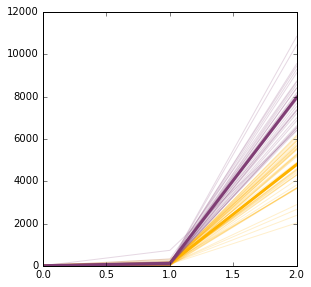

In [28]:
fig = pl.figure(figsize=(10,10))

pl.subplot(2,2,1)
for l in range(2):
    pl.plot(vcluster[kmlabels2 == l].T, 
            color = kelly_colors_hex[l], alpha = 0.2)
    pl.plot(c2kmeans[0][l].T, color = kelly_colors_hex[l], linewidth = 3) #, label = 'KMeans with 2 Clusters')
#pl.xlabel('Cities', fontsize = 15)
#pl.ylabel('Water, electricity..', fontsize = 15)
#pl.suptitle('City Comparison')

In [29]:
c3kmeans = scipy.cluster.vq.kmeans(vcluster, 3, iter=1)

kmlabels3, kmdistances3 = vq(vcluster, c3kmeans[0])
print ("3 clusters labels")
print (kmlabels3)

3 clusters labels
[2 1 0 0 0 0 1 0 1 1 0 1 0 0 1 1 0 1 0 2 2 2 0 2 2 2 2 0 0 0 0 1 1 1 2 0 0
 0 2 2 2 1 0 2 0 1 1 1 1 2 1 0 0 1 0 2 2 2 2 0 0 1 2 0 0 1 0 0 1 2 2 0 2 2
 0 1 1 2]


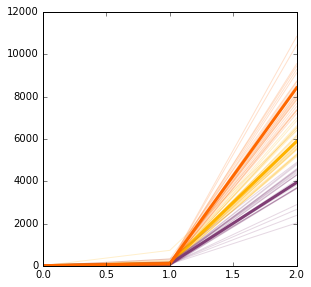

In [30]:
fig = pl.figure(figsize=(10,10))

pl.subplot(2,2,1)
for l in range(3):
    pl.plot(vcluster[kmlabels3 == l].T, 
            color = kelly_colors_hex[l], alpha = 0.2)
    pl.plot(c3kmeans[0][l].T, color = kelly_colors_hex[l], linewidth = 3) #, label = 'KMeans with 2 Clusters')


In [91]:
citysizeraw = imco[['ciudad', 'inf', 'citygrowth', 'waterpc', 'popdensity']]

In [104]:
citysize = citysizeraw.set_index(['ciudad'])
cityname = citysize.index.values

#citysize

In [95]:
citycluster = citysize.values
(citysize).shape
#here we tak away population as it is has too strong of an influence on the clusters and was pushing them in one direction
#(finalcluster[:,:6]).shape

(78, 4)

In [98]:
normcluster = citycluster - citycluster.mean(axis=0).T
w = whiten(normcluster)
w.std(axis=0)

array([ 1.,  1.,  1.,  1.])

In [106]:
final_5ck = scipy.cluster.vq.kmeans(w, 5, iter=1)
kmlabels5, kmdistances5 = vq(w, final_5ck[0])
print ("5 clusters labels")
print (kmlabels5)

5 clusters labels
[4 2 2 4 2 2 0 4 2 2 4 2 2 2 2 2 2 2 1 3 4 4 2 4 4 4 4 2 2 4 2 2 2 2 4 2 2
 2 4 4 4 2 2 4 4 2 2 2 2 4 2 1 0 2 4 4 4 0 4 2 0 2 4 2 2 2 2 4 2 4 4 2 4 4
 2 2 2 4]


In [107]:
citycluster[0]

array([  1.84360000e+05,   1.11744126e+00,   1.03385094e+02,
         9.56275897e+03])

In [108]:
print (kmlabels5 == 0)
print ((citycluster[kmlabels5 == 0]).shape)
print ((citycluster[kmlabels5 == 1]).shape)

[False False False False False False  True False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False  True False False False False  True False False
  True False False False False False False False False False False False
 False False False False False False]
(4, 4)
(2, 4)


cluster 1:  ['Campeche' 'Chetumal ' 'Mazatlan' 'Hermosillo']
cluster 2:  ['Juarez' 'Cancun']
cluster 3:  ['Ensenada' 'Mexicali' 'La Paz' 'Los Cabos' 'Saltillo' 'Monclova-Frontera'
 'Piedras Negras' 'Tecoman' 'Colima-Villa de alvarez' 'Manzanillo'
 'Tuxtla Gutierrez' 'Tapachula' 'Chihuahua' 'Guanajuato' 'Salamanca'
 'Moroleon-Uriangato' 'Chilpancingo' 'Tula' 'Tulancingo' 'Pachuca'
 'Ocotlan' 'Puerto Vallarta' 'Toluca' 'Cuautla' 'Cuernavaca' 'Oaxaca'
 'Tehuantepec-Salina Cruz' 'Puebla-Tlaxcala' 'Tehuacan' 'San Juan del Rio'
 'Rioverde-Ciudad Fernandez' 'Guaymas' 'Cardenas' 'Tampico-Panuco'
 'Matamoros' 'Nuevo Laredo' 'Reynosa-Rio Bravo' 'Tlaxcala-Apizaco'
 'Orizaba' 'Coatzacoalcos' 'Minatitlan' 'Merida']
cluster 4:  ['Valle de Mexico']
cluster 5:  ['Aguascalientes' 'Tijuana' 'Ciudad del Carmen' 'La Laguna' 'Durango'
 'Celaya' 'Irapuato' 'Leon' 'La Piedad-Penjamo' 'San Francisco del Rincon'
 'Acapulco' 'Guadalajara' 'Zamora-Jacona' 'Morelia' 'Uruapan' 'Tepic'
 'Monterrey' 'Queretaro' 'San

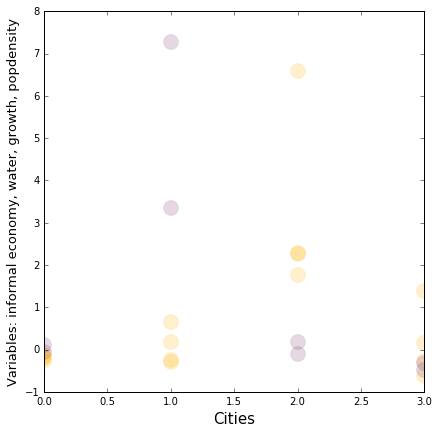

In [111]:
fig = pl.figure(figsize=(15,15))

pl.subplot(2,2,1)
for l in range(2):
    for j in range(len(w[kmlabels5 == l])):
        pl.plot(w[kmlabels5 == l][j], '.', ms = 30, 
                color = kelly_colors_hex[l], alpha = 0.2)
pl.xlabel('Cities', fontsize = 15)
pl.ylabel('Variables: informal economy, water, growth, popdensity', fontsize = 13)
ax.set_title('test', fontsize = 12)
print ("cluster 1: ", cityname[kmlabels5 == 0])
print ("cluster 2: ", cityname[kmlabels5 == 1])
print ("cluster 3: ", cityname[kmlabels5 == 2])
print ("cluster 4: ", cityname[kmlabels5 == 3])
print ("cluster 5: ", cityname[kmlabels5 == 4])

##Research Stats quoted in paper

In [33]:
imco['percentemployedformal'].mean()

0.46347959029487185